In [41]:
from statsmodels.stats.power import TTestIndPower
from scipy import stats
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
#!unzip 'womens-shoes-prices.zip'

In [2]:
shoes_june_df = pd.read_csv('Datafiniti_Womens_Shoes_Jun19.csv')

In [3]:
len(shoes_june_df)

10000

In [4]:
shoes_june_df.head().T

,0,1,2,3,4
id,AWpyySsJAGTnQPR7wNt4,AWpyyyb3AGTnQPR7wN-u,AWpyzlajAGTnQPR7wOX8,AWpyxomE0U_gzG0hkA1q,AWpyxChWJbEilcB6RhWx
dateAdded,2019-05-01T09:27:22Z,2019-05-01T09:27:19Z,2019-05-01T09:26:59Z,2019-05-01T09:26:56Z,2019-05-01T09:26:56Z
dateUpdated,2019-05-01T09:27:22Z,2019-05-01T09:27:19Z,2019-05-01T09:26:59Z,2019-05-01T09:26:56Z,2019-05-01T09:26:56Z
asins,NaN,NaN,NaN,NaN,NaN
brand,City Classified,Skechers,Floral,Jambu,Trotters
categories,"Clothing,Shoes,Womens Shoes,All Womens Shoes","Clothing,Shoes,Womens Shoes,All Womens Shoes","Clothing,Shoes,Womens Shoes,All Womens Shoes","Clothing,Shoes,Womens Shoes,All Womens Shoes","Clothing,Shoes,Womens Shoes,All Womens Shoes"
primaryCategories,Shoes,Shoes,Shoes,Shoes,Shoes
colors,Black,Taupe,Black,Black/Multi,White
dimension,NaN,NaN,NaN,NaN,NaN
ean / upc,656000000000,192000000000,709000000000,884000000000,887000000000


## the dataframe for black shoes

In [5]:
shoes_b_june_df = shoes_june_df[shoes_june_df['colors'].str.contains('black', case=False)]

In [6]:
shoes_two_june_df = shoes_june_df
shoes_two_june_df['manufacturer'].unique()

array([nan, 'Comfy Feet', 'asics', 'VANS', 'ASICS', 'ELLIE SHOES',
       'Brinley Co.', 'Journee Collection', 'Brinley Co', 'Pleaser',
       'PleaserUSA', 'Bonnibel', 'Alegria', 'Dyeables', 'Pleaser USA',
       'Alfani', 'Easy Street', 'Dr. Martens', 'New Balance', 'Crocs',
       'Anna', 'Ugg Australia', 'BEARPAW', 'SoftWalk', 'CUDAS', 'Reebok',
       'Propet', 'Riverberry', 'Trotters', 'TOMS', 'Grendene',
       'Onitsuka Tiger', 'Avia', 'Touch Ups', 'Franco Sarto',
       'Cobb Hill by New Balance', 'Minnetonka Slippers', 'Minnetonka',
       'Toms', 'Minnetonka Moccasin Company, Inc.', 'El Naturalista',
       'WalterDrake', 'Babe', 'Rocket Dog', 'Bearpaw',
       'Minnetonka Womens Shoes', 'The Highest Heel', 'Nomad Footwear',
       'OOFOS', 'FitFlop', 'Oofos', 'White Mountain',
       'Touch Ups by Benjamin Walk', 'Style & Co.', 'Timberland', 'Ugg',
       'Fila', 'Bearpaw Kids', 'Silver Lilly',
       'Vionic with Orthaheel Technology'], dtype=object)

In [7]:
shoes_two_june_df = shoes_two_june_df.loc[~(shoes_two_june_df['manufacturer'].isna())]

In [8]:
len(shoes_two_june_df)

1362

## shoes_twobb_june_df includes all black shoes for the two brand: Brinley Co. and Propet

In [9]:
shoes_twobb_june_df = shoes_two_june_df[shoes_two_june_df['manufacturer'].str.contains('Brinley Co.|Brinley Co|Propet'
                                                                                     , regex=True)]
len(shoes_twobb_june_df)

946

In [10]:
propet_b_df = shoes_two_june_df[shoes_two_june_df['manufacturer'].str.contains('Propet')]

In [11]:
propet_price_b = propet_b_df['prices.amountMax']
len(propet_price_b)
# propet_price_b.unique()

530

In [12]:
brinley_b_df = shoes_two_june_df[shoes_two_june_df['manufacturer'].str.contains('Brinley Co.|Brinley Co', regex=True)]

In [13]:
brinley_price_b = brinley_b_df['prices.amountMax']
len(brinley_price_b)
# brinley_price_b.unique()

416

## bootstrapping - Propet black shoes June

In [21]:
bootstrap_samples_p = []
bootstrap_sample_means_p = np.zeros(530)
bootstrap_sample_95pcts_p = np.zeros(530)
for i in range(530):
    bootstrap_sample = np.random.choice(propet_price_b, size=530)
    bootstrap_samples_p.append(bootstrap_sample)
    bootstrap_sample_means_p[i] = bootstrap_sample.mean()
    bootstrap_sample_95pct_p = np.percentile(a=bootstrap_sample, q=95)
    bootstrap_sample_95pcts_p[i] = bootstrap_sample_95pct_p

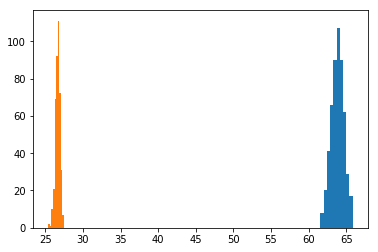

In [51]:
fig, ax = plt.subplots()
ax.hist(bootstrap_sample_means_p)
ax.hist(bootstrap_sample_means_b);

In [55]:
bootstrap_sample_means_p.mean()

63.84254827340691

In [56]:
bootstrap_sample_means_b.mean()

26.653120955066566

In [22]:
np.std(bootstrap_sample_means_p)

0.8392971033910619

(array([  8.,  20.,  41.,  66.,  90., 107.,  90.,  62.,  29.,  17.]),
 array([61.56135849, 61.99079811, 62.42023774, 62.84967736, 63.27911698,
        63.7085566 , 64.13799623, 64.56743585, 64.99687547, 65.42631509,
        65.85575472]),
 <a list of 10 Patch objects>)

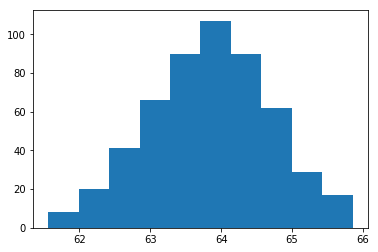

In [53]:
plt.hist(bootstrap_sample_means_p)

In [29]:
np.percentile(a=bootstrap_sample_95pcts_p, q=2.5)

82.95

## bootstrapping - Brinley co black shoes June

In [25]:
bootstrap_samples_b = []
bootstrap_sample_means_b = np.zeros(416)
for i in range(416):
    bootstrap_sample = np.random.choice(brinley_price_b, size=416)
    bootstrap_samples_b.append(bootstrap_sample)
    bootstrap_sample_means_b[i] = bootstrap_sample.mean()


In [40]:
np.percentile(a=brinley_price_b, q=8)

37.04000000000001

In [27]:
bootstrap_sample_means_b.std()

0.32458742972053634

(array([  2.,   1.,  10.,  21.,  69.,  92., 111.,  72.,  31.,   7.]),
 array([25.39403846, 25.60380288, 25.81356731, 26.02333173, 26.23309615,
        26.44286058, 26.652625  , 26.86238942, 27.07215385, 27.28191827,
        27.49168269]),
 <a list of 10 Patch objects>)

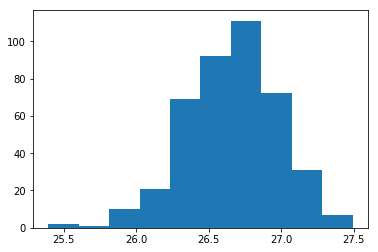

In [52]:
plt.hist(bootstrap_sample_means_b)

## A/B Testing 

In [42]:
def Cohen_d(group1, group2):

    # Compute Cohen's d.

    # group1: Series or NumPy array
    # group2: Series or NumPy array

    # returns a floating point number 

    diff = group1.mean() - group2.mean()

    n1, n2 = len(group1), len(group2)
    var1 = group1.var()
    var2 = group2.var()

    # Calculate the pooled threshold as shown earlier
    pooled_var = (n1 * var1 + n2 * var2) / (n1 + n2)
    
    # Calculate Cohen's d statistic
    d = diff / np.sqrt(pooled_var)
    
    return d

In [60]:
print(propet_price_b.var())
print(propet_price_b.std())

383.29564158647497
19.577937623418737


In [49]:
effect_size = Cohen_d(propet_price_b, brinley_price_b)
effect_size

2.4195136064059035

In [48]:
power_analysis = TTestIndPower()
power_analysis.solve_power(alpha=.05, effect_size=effect_size, power=.80, alternative='two-sided')

3.918437279986674